In [1]:
%pip install -qU langchain-ollama
%pip install -U ollama


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from langchain_ollama import ChatOllama

llm = ChatOllama(
    model="llava:7b",
    temperature=0,
    # other params...
)

In [3]:
from langchain_core.messages import AIMessage

messages = [
    (
        "system",
        "You are a helpful assistant that translates English to French. Translate the user sentence.",
    ),
    ("human", "I love programming."),
]
ai_msg = llm.invoke(messages)
ai_msg

AIMessage(content=" Je suis un assistante utile qui traduit de l'anglais en français. Traduction : Je suis un programmeur passionné. ", additional_kwargs={}, response_metadata={'model': 'llava:7b', 'created_at': '2025-04-02T12:45:57.308429Z', 'done': True, 'done_reason': 'stop', 'total_duration': 48579102292, 'load_duration': 27013487667, 'prompt_eval_count': 30, 'prompt_eval_duration': 17383214416, 'eval_count': 34, 'eval_duration': 3998885250, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-70fe0129-132b-4a43-973c-daf7e0be07c5-0', usage_metadata={'input_tokens': 30, 'output_tokens': 34, 'total_tokens': 64})


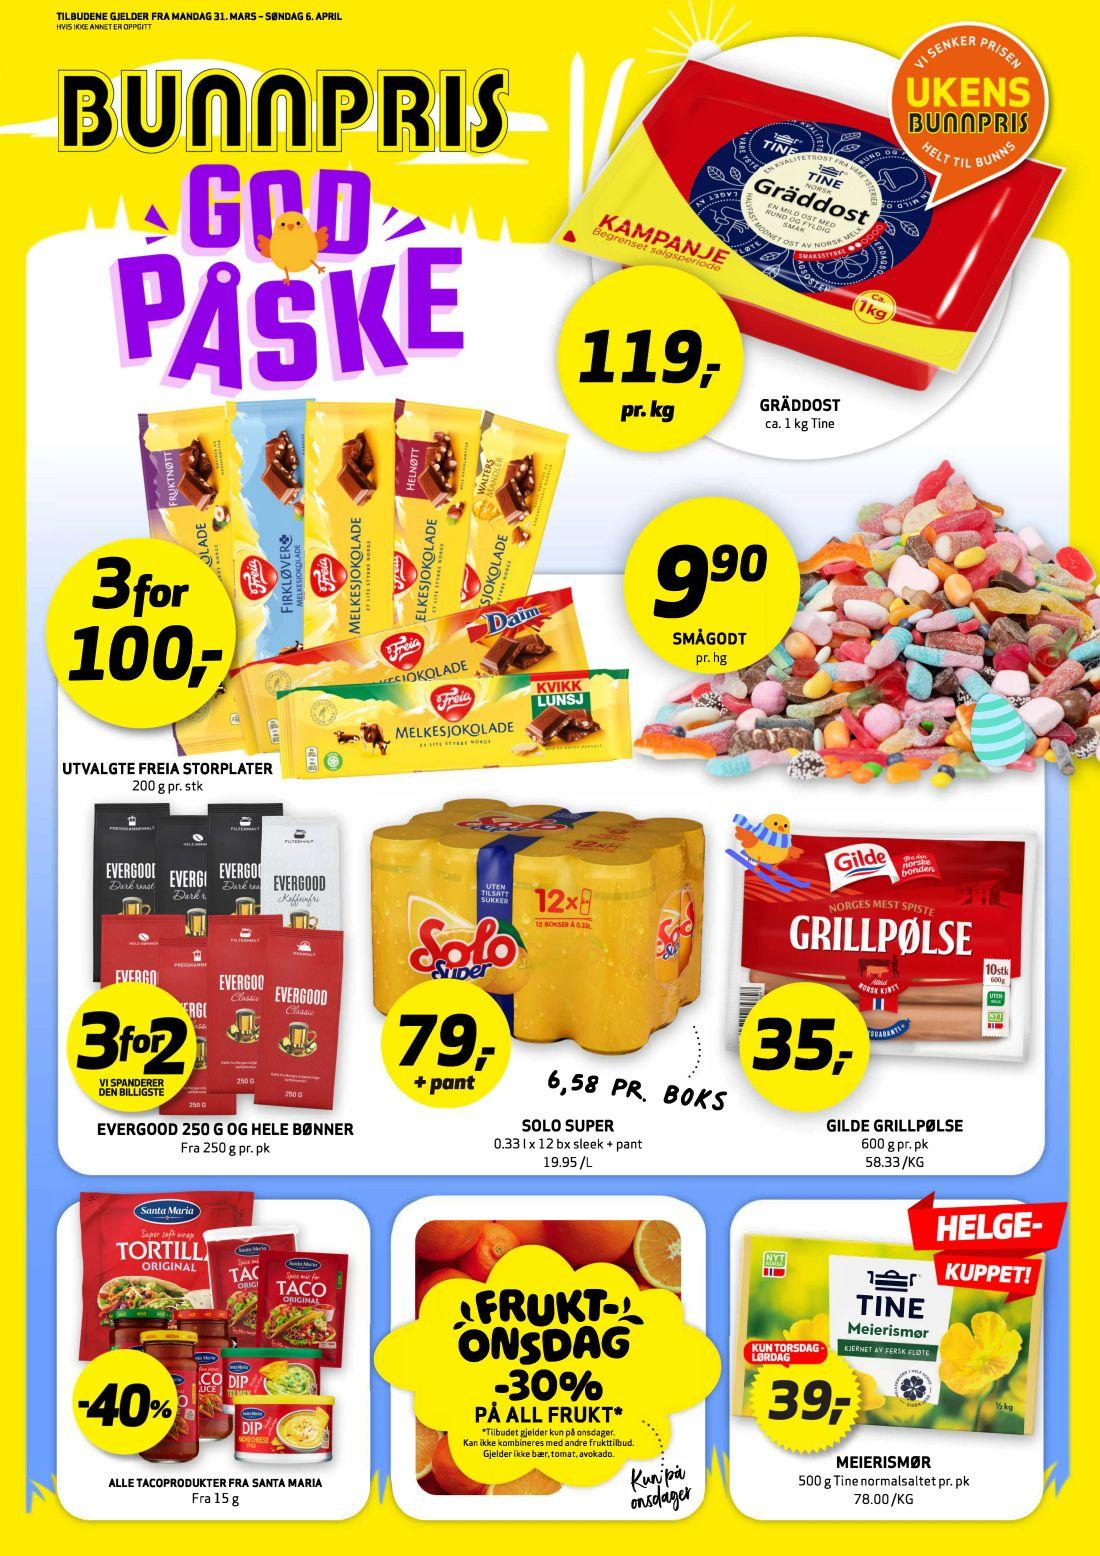

In [5]:
import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image


def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Re-sized Base64 string
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Disply base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


file_path = "data/downloaded_images/bunnpris-no/image_0.jpg"
pil_image = Image.open(file_path)

image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)

In [ ]:
from langchain_core.messages import HumanMessage
from langchain_ollama import ChatOllama

llm = ChatOllama(model="llava:13b", temperature=0)


def prompt_func(data):
    text = data["text"]
    image = data["image"]

    image_part = {
        "type": "image_url",
        "image_url": f"data:image/jpeg;base64,{image}",
    }

    content_parts = []

    text_part = {"type": "text", "text": text}

    content_parts.append(image_part)
    content_parts.append(text_part)

    return [HumanMessage(content=content_parts)]


from langchain_core.output_parsers import StrOutputParser

chain = prompt_func | llm | StrOutputParser()

query_chain = chain.invoke(
    {"text": "You are tasked with finding the name of the products and the price on the image i provided?", "image": image_b64}
)

print(query_chain)

 The image shows a variety of products, each with its own name and price. Here's a list of the items visible in the image:

1. "BUNNPRIS" - 199 kr (which translates to "Easter Bunny" in English)
2. "GOD PASKE" - 199 kr (which means "Good Easter" in English)
3. "KRYSJA" - 499 kr (which is a type of pastry, possibly a sweet bread or bun)
4. "PIZZA" - 299 kr (which could be a frozen pizza or a mix to make pizza at home)
5. "BANANER" - 199 kr (which might refer to banana-flavored items, but the specific product is not clear from the image)
6. "KJEK" - 499 kr (which could be a type of pastry or baked good, but the exact name and description are not visible in the image)
7. "PIZZA" - 299 kr (same as item 5, likely indicating another variety of pizza)
8. "KJEK" - 499 kr (same as item 6, possibly a different type of pastry or baked good)
9. "PIZZA" - 299 kr (same as items 5 and 7, likely indicating another variety of pizza)
10. "KJEK" - 499 kr (same as items 6 and 8, possibly a different type 